In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd

In [2]:
! pwd
expr_df = pd.read_csv("../metadata/length_and_depth.csv")
expr_df = expr_df.drop("nvar", axis=1)
expr_df = expr_df.rename(columns={
    "length" : "expr_length",
    "depth" : "expr_depth"
})
expr_df

/Users/felixgao/Desktop/Year3/STA378/OptimizationParameterTuning/Julia Notebook/src


problem        objtype  variable_nvar  expr_length  expr_depth
0        NZF1  least_squares           True          250           8
1     arglina  least_squares           True        10404           9
2     arglinb  least_squares           True        40200           8
3     arglinc          other           True        39204           7
4     argtrig          other           True          497           7
..        ...            ...            ...          ...         ...
100    tridia          other           True          398           6
101    vardim          other           True          798           6
102  vibrbeam  least_squares          False          481          13
103    watson  least_squares          False         3900          12
104     woods          other           True          425           7

[105 rows x 5 columns]

In [ ]:
complete_df = pd.read_csv("../results/complete_dataset_as_of_nov6.csv")
complete_df = complete_df[complete_df["is_init_run"] == 0]
complete_df = complete_df.rename(columns={"name" : "problem"})
df = complete_df.merge(
    expr_df,
    on = 'problem',
    how = "inner"
)
# df.to_csv("complete_data_and_metadata.csv", index=False)

In [62]:
group_cols = ["problem", "nvar"]

d = df[df["time"].notna()].copy()
d = d.sort_values(group_cols + ["time", "mem"], ascending=True)

best_idx = d.groupby(group_cols)["time"].idxmin()
best_mem_df = d.loc[best_idx].reset_index(drop=True)
best_mem_df

status   problem       solver  mem  nvar       time     memory  \
0    first_order      NZF1  LBFGSSolver   64    91   1.405412   0.241360   
1    first_order      NZF1  LBFGSSolver   72   988   3.127719   2.406504   
2    first_order   arglina  LBFGSSolver    4   100   0.004524   0.029440   
3    first_order   arglina  LBFGSSolver    5  1000   1.400665   0.240920   
4    first_order   arglinb  LBFGSSolver    1   100   1.422291   0.020488   
..           ...       ...          ...  ...   ...        ...        ...   
179  first_order    vardim  LBFGSSolver   21  1000  28.733923   1.509576   
180  first_order  vibrbeam  LBFGSSolver   11     8   0.578265   0.054456   
181    unbounded    watson  LBFGSSolver   51    31   1.019050  32.288992   
182  first_order     woods  LBFGSSolver    8   100   1.288446   0.060864   
183  first_order     woods  LBFGSSolver    8  1000   1.457438   0.354344   

     num_iter  nvmops  neval_obj  ...  neval_grad  init_eval_grad_time  \
0          59      59         70  ...          64             0.000017   
1          81      81         94  ...          86             0.001715   
2           1       1          3  ...           3             0.000059   
3           1       1          3  ...           3             0.005946   
4           2       2         29  ...           5             0.000051   
..        ...     ...        ...  ...         ...                  ...   
179      1165    1165       6897  ...        6873             0.004314   
180       103     103        179  ...         126             0.000006   
181         1       1          8  ...           8             0.001956   
182        45      45         69  ...          60             0.000016   
183        43      43         68  ...          58             0.001371   

     init_eval_grad_mem  init_eval_grad_alloc  is_init_run  is_scalable  \
0              0.001440                     5        False        False   
1              0.008600                     5        False         True   
2              0.001520                     5        False        False   
3              0.008664                     5        False         True   
4              0.001520                     5        False        False   
..                  ...                   ...          ...          ...   
179            0.008664                     5        False         True   
180            0.000720                     5        False        False   
181            4.349024                 42554        False        False   
182            0.001520                     5        False        False   
183            0.008664                     5        False         True   

           objtype  variable_nvar  expr_length expr_depth  
0    least_squares           True          250          8  
1    least_squares           True          250          8  
2    least_squares           True        10404          9  
3    least_squares           True        10404          9  
4    least_squares           True        40200          8  
..             ...            ...          ...        ...  
179          other           True          798          6  
180  least_squares          False          481         13  
181  least_squares          False         3900         12  
182          other           True          425          7  
183          other           True          425          7  

[184 rows x 23 columns]

In [63]:
best_mem_map = d.loc[best_idx].set_index(group_cols)["mem"]

df = df.copy()
df["best_problem_mem"] = df.set_index(group_cols).index.map(best_mem_map)
df

status problem       solver  mem  nvar      time    memory  \
0      first_order    NZF1  LBFGSSolver    1    91  1.409402  0.125416   
1      first_order    NZF1  LBFGSSolver    2    91  1.407668  0.095296   
2      first_order    NZF1  LBFGSSolver    3    91  1.407882  0.103456   
3      first_order    NZF1  LBFGSSolver    4    91  1.407476  0.098352   
4      first_order    NZF1  LBFGSSolver    5    91  1.407906  0.108416   
...            ...     ...          ...  ...   ...       ...       ...   
18821  first_order   woods  LBFGSSolver   96  1000  1.482090  3.197624   
18822  first_order   woods  LBFGSSolver   97  1000  1.481800  3.229800   
18823  first_order   woods  LBFGSSolver   98  1000  1.482000  3.261976   
18824  first_order   woods  LBFGSSolver   99  1000  1.481908  3.294152   
18825  first_order   woods  LBFGSSolver  100  1000  1.483005  3.326648   

       num_iter  nvmops  neval_obj  ...  init_eval_grad_time  \
0           287     287        328  ...             0.000031   
1           199     199        223  ...             0.000019   
2           213     213        234  ...             0.000016   
3           191     191        209  ...             0.000017   
4           209     209        231  ...             0.000017   
...         ...     ...        ...  ...                  ...   
18821        64      64         84  ...             0.001356   
18822        64      64         84  ...             0.001373   
18823        64      64         84  ...             0.001367   
18824        64      64         84  ...             0.001358   
18825        64      64         84  ...             0.001365   

       init_eval_grad_mem  init_eval_grad_alloc  is_init_run  is_scalable  \
0                0.001440                     5        False        False   
1                0.001440                     5        False        False   
2                0.001440                     5        False        False   
3                0.001440                     5        False        False   
4                0.001440                     5        False        False   
...                   ...                   ...          ...          ...   
18821            0.008664                     5        False         True   
18822            0.008664                     5        False         True   
18823            0.008664                     5        False         True   
18824            0.008664                     5        False         True   
18825            0.008664                     5        False         True   

             objtype  variable_nvar  expr_length  expr_depth best_problem_mem  
0      least_squares           True          250           8               64  
1      least_squares           True          250           8               64  
2      least_squares           True          250           8               64  
3      least_squares           True          250           8               64  
4      least_squares           True          250           8               64  
...              ...            ...          ...         ...              ...  
18821          other           True          425           7                8  
18822          other           True          425           7                8  
18823          other           True          425           7                8  
18824          other           True          425           7                8  
18825          other           True          425           7                8  

[18826 rows x 24 columns]

In [192]:
problems = df["problem"].unique()
rng = np.random.default_rng(seed=66)
rng.shuffle(problems)

n = len(problems)
n_train = int(0.7 * n)
n_valid = int(0.15 * n)

train_problems = problems[:n_train]
valid_problems = problems[n_train:n_train + n_valid]
test_problems  = problems[n_train + n_valid:]

train_df = df[df["problem"].isin(train_problems)].reset_index(drop=True)
valid_df = df[df["problem"].isin(valid_problems)].reset_index(drop=True)
test_df  = df[df["problem"].isin(test_problems)].reset_index(drop=True)

In [288]:
from sklearn.tree import DecisionTreeRegressor
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem"
                ]
target_col = "time"
X_train = train_df[feature_cols].to_numpy(dtype=float)
X_valid = valid_df[feature_cols].to_numpy(dtype=float)
X_test  = test_df[feature_cols].to_numpy(dtype=float)

t_train = np.log(train_df[target_col].to_numpy(dtype=float))
t_valid = np.log(valid_df[target_col].to_numpy(dtype=float))
t_test  = np.log(test_df[target_col].to_numpy(dtype=float))

In [250]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_tree = None
best_score = np.inf
best_params = None

# Comprehensive parameter lists
depth_list = [None, 5, 10, 15, 20, 25, 30, 40, 50, 100]
leaf_list = [1, 2, 5, 10, 20, 50, 100]
split_list = [2, 5, 10, 20, 50, 100]
feat_list = [1.0, "sqrt", "log2"]
ccp_list = [0.0, 0.0001, 0.001, 0.01, 0.1]

for max_depth in depth_list:
    for min_leaf in leaf_list:
        for min_split in split_list:
            for max_feat in feat_list:
                for ccp in ccp_list:
                    tree = DecisionTreeRegressor(
                        max_depth=max_depth,
                        min_samples_leaf=min_leaf,
                        min_samples_split=min_split,
                        max_features=max_feat,
                        ccp_alpha=ccp,
                        random_state=66,
                    )
                    tree.fit(X_train, t_train)

                    pred_valid_log = tree.predict(X_valid)
                    mse_valid = mean_squared_error(t_valid, pred_valid_log)

                    if mse_valid < best_score:
                        best_score = mse_valid
                        best_tree = tree
                        best_params = (max_depth, min_leaf, min_split, max_feat, ccp)
                        print(f"New best: depth={max_depth}, leaf={min_leaf}, split={min_split}, feat={max_feat}, ccp={ccp}, MSE={mse_valid:.6f}")
                    else:
                        # Optional: comment out the line below to reduce terminal noise
                        pass 

print("-" * 30)
print(f"Best validation MSE: {best_score:.6f}")
print(f"Best params (depth, leaf, split, feat, ccp): {best_params}")

New best: depth=None, leaf=1, split=2, feat=1.0, ccp=0.0, MSE=2.611441
New best: depth=None, leaf=1, split=2, feat=1.0, ccp=0.0001, MSE=2.592784
New best: depth=None, leaf=1, split=2, feat=1.0, ccp=0.001, MSE=2.260290
New best: depth=None, leaf=1, split=2, feat=1.0, ccp=0.01, MSE=2.179000
New best: depth=None, leaf=1, split=2, feat=1.0, ccp=0.1, MSE=1.095655
New best: depth=None, leaf=1, split=50, feat=sqrt, ccp=0.0, MSE=1.021088
New best: depth=None, leaf=1, split=50, feat=sqrt, ccp=0.0001, MSE=1.011085
New best: depth=None, leaf=1, split=50, feat=sqrt, ccp=0.001, MSE=0.984184
New best: depth=None, leaf=2, split=20, feat=sqrt, ccp=0.01, MSE=0.808949
New best: depth=None, leaf=10, split=100, feat=sqrt, ccp=0.01, MSE=0.773996
New best: depth=None, leaf=50, split=2, feat=sqrt, ccp=0.001, MSE=0.739076
New best: depth=None, leaf=50, split=2, feat=sqrt, ccp=0.01, MSE=0.690015
New best: depth=5, leaf=1, split=2, feat=sqrt, ccp=0.0, MSE=0.627001
New best: depth=5, leaf=1, split=2, feat=sqrt, 

In [289]:
depth, leaf, split, feat, ccp = best_params

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])

final_tree = DecisionTreeRegressor(
                max_depth=depth,
                min_samples_leaf=leaf,
                min_samples_split=split,
                max_features=feat,
                ccp_alpha=ccp,
                random_state=66,
            )
final_tree.fit(X_train_full, t_train_full)

# test regression metrics in real time units
pred_test_time = final_tree.predict(X_test)


In [252]:
feature_cols = [c for c in feature_cols if c != "mem"]
X_test  = test_df[feature_cols]
group_cols = ["problem", "nvar"]
problem_feature_cols = [c for c in feature_cols if c != "mem"]
X_test = (
    test_df.sort_values(group_cols)
           .drop_duplicates(subset=group_cols, keep="first")[problem_feature_cols]
           .reset_index(drop=True)
)
X_test

nvar  expr_length  expr_depth  init_eval_obj_time  init_eval_grad_time
0      6          115           7            0.000008             0.000008
1    100          642           7            0.000003             0.000038
2   1000          642           7            0.000019             0.002472
3    100          496           9            0.000004             0.000045
4   1000          496           9            0.000023             0.004092
5    100          956           6            0.000004             0.000055
6    961          956           6            0.000026             0.004897
7    100          796           6            0.000005             0.000047
8    961          796           6            0.000029             0.004014
9    100         3335           8            0.000005             0.000057
10  1000         3335           8            0.000030             0.004979
11   100         3335           8            0.000004             0.000056
12  1000         3335           8            0.000027             0.005137
13    99          887           6            0.000018             0.000234
14   999          887           6            0.000285             0.025743
15    99          887           6            0.000025             0.000245
16   999          887           6            0.000261             0.025841
17   100          568          10            0.000004             0.000043
18     8         3000          13            0.000011             0.000023
19     8         3000          13            0.000012             0.000031
20     6          232          10            0.000003             0.000004
21   100          201           8            0.000002             0.000013
22  1000          201           8            0.000006             0.001037
23     7          257           8            0.000105             0.000124
24     6          139           7            0.000029             0.000025
25   100          403           7            0.000002             0.000039
26  1000          403           7            0.000003             0.002894

In [253]:
import math

def choose_best_mem(model, x_problem, mem_candidates):
    preds = []
    for mem in mem_candidates:
        x = np.concatenate([x_problem, [mem]])
        preds.append((mem, math.exp(model.predict(x.reshape(1, -1))[0])))
    return min(preds, key=lambda x: x[1])

In [254]:
depth, leaf, split, feat, ccp = best_params

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])

final_dt = DecisionTreeRegressor(
                max_depth=depth,
                min_samples_leaf=leaf,
                min_samples_split=split,
                max_features=feat,
                ccp_alpha=ccp,
                random_state=66,
            )
X_train_full

array([[9.100000e+01, 2.500000e+02, 8.000000e+00, 1.375600e-05,
        3.141000e-05, 1.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.964000e-06,
        1.938700e-05, 2.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.553000e-06,
        1.647200e-05, 3.000000e+00],
       ...,
       [1.000000e+03, 3.980000e+02, 6.000000e+00, 1.784000e-06,
        3.022109e-03, 9.800000e+01],
       [1.000000e+03, 3.980000e+02, 6.000000e+00, 1.874000e-06,
        3.020345e-03, 9.900000e+01],
       [1.000000e+03, 3.980000e+02, 6.000000e+00, 2.284000e-06,
        2.985198e-03, 1.000000e+02]], shape=(16126, 6))

In [255]:
final_dt.fit(X_train_full, t_train_full)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=15, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=20,
                      random_state=66)

In [256]:
group_cols = ["problem", "nvar"]
problem_cols = ["problem", "nvar", "mem", "best_problem_mem", "time"]

problems = (
    test_df.loc[test_df["mem"] == test_df["best_problem_mem"], problem_cols]
           .drop_duplicates(subset=group_cols, keep="first")
           .reset_index(drop=True)
           .rename(columns={"time": "best_time"})
)
problems

problem  nvar  mem  best_problem_mem  best_time
0         biggs6     6    7                 7   0.398948
1       chainwoo   100    3                 3   1.372517
2   chnrosnb_mod   100   24                24   1.429775
3       clplatea   100   48                48   1.396622
4       clplatec   100   87                87   1.416273
5          curly   100   96                96   1.417469
6        curly10   100   98                98   1.435234
7       dixmaano    99   92                92   0.053089
8       dixmaanp    99  100               100   0.048949
9       fminsrf2   100   69                69   1.464990
10        gauss2     8   95                95   0.687109
11        gauss3     8   49                49   0.684025
12      lanczos1     6   16                16   0.372617
13        nondia   100    3                 3   1.237740
14      palmer1d     7   91                91   0.460858
15      palmer5c     6   15                15   0.399134
16      penalty1   100    2                 2   1.256430
17      chainwoo  1000    9                 9  10.316803
18  chnrosnb_mod  1000   38                38  23.898074
19      clplatea   961   97                97   3.929972
20      clplatec   961   99                99  66.487131
21         curly  1000   36                36  42.815194
22       curly10  1000   36                36  42.832539
23      dixmaano   999    2                 2   9.980420
24      dixmaanp   999    4                 4   6.945802
25        nondia  1000    5                 5   1.326348
26      penalty1  1000    4                 4   1.366686

In [257]:
mem_candidates = np.arange(1, 101)
preds = []

for i, x_problem in enumerate(X_test.itertuples(index=False, name=None)):
    pred = choose_best_mem(final_dt, x_problem, mem_candidates)
    preds.append(pred)

    prob_name = problems.iloc[i]["problem"]
    nvar = problems.iloc[i]["nvar"]
    actual_best_mem = problems.iloc[i]["best_problem_mem"]

    print(
        f"Best predicted mem for {prob_name}({nvar}) is mem={pred[0]} "
        f"and the actual best mem is {actual_best_mem} with runtime={pred[1]}"
    )
preds

Best predicted mem for biggs6(6) is mem=1 and the actual best mem is 7 with runtime=1.2587113927313893
Best predicted mem for chainwoo(100) is mem=1 and the actual best mem is 3 with runtime=1.2587113927313893
Best predicted mem for chnrosnb_mod(100) is mem=2 and the actual best mem is 24 with runtime=2.419055109792187
Best predicted mem for clplatea(100) is mem=1 and the actual best mem is 48 with runtime=1.0374359502664612
Best predicted mem for clplatec(100) is mem=1 and the actual best mem is 87 with runtime=1.5572358776550843
Best predicted mem for curly(100) is mem=1 and the actual best mem is 96 with runtime=1.8906209854176308
Best predicted mem for curly10(100) is mem=1 and the actual best mem is 98 with runtime=1.8906209854176308
Best predicted mem for dixmaano(99) is mem=1 and the actual best mem is 92 with runtime=1.3670741896593108
Best predicted mem for dixmaanp(99) is mem=2 and the actual best mem is 100 with runtime=11.544279141585886
Best predicted mem for fminsrf2(100)

[(np.int64(1), 1.2587113927313893),
 (np.int64(1), 1.2587113927313893),
 (np.int64(2), 2.419055109792187),
 (np.int64(1), 1.0374359502664612),
 (np.int64(1), 1.5572358776550843),
 (np.int64(1), 1.8906209854176308),
 (np.int64(1), 1.8906209854176308),
 (np.int64(1), 1.3670741896593108),
 (np.int64(2), 11.544279141585886),
 (np.int64(1), 1.392300151808817),
 (np.int64(1), 1.392300151808817),
 (np.int64(1), 1.392300151808817),
 (np.int64(1), 1.392300151808817),
 (np.int64(1), 0.14490148969870226),
 (np.int64(1), 39.897079373468564),
 (np.int64(1), 0.14490148969870226),
 (np.int64(1), 39.897079373468564),
 (np.int64(1), 0.925377480012599),
 (np.int64(1), 1.0374359502664612),
 (np.int64(1), 1.0374359502664612),
 (np.int64(1), 0.925377480012599),
 (np.int64(1), 1.2587113927313893),
 (np.int64(1), 3.759020165243291),
 (np.int64(1), 0.7097677572573037),
 (np.int64(1), 1.2587113927313893),
 (np.int64(1), 1.2587113927313893),
 (np.int64(1), 3.759020165243291)]

In [281]:
problems["predicted_mem"] = [pred[0] for pred in preds]
problems["predicted_time"] = [pred[1] for pred in preds]
problems

problem  nvar  best_problem_mem  best_time  predicted_mem  \
0         biggs6     6                 7   0.398948              1   
1       chainwoo   100                 3   1.372517              1   
2   chnrosnb_mod   100                24   1.429775              2   
3       clplatea   100                48   1.396622              1   
4       clplatec   100                87   1.416273              1   
5          curly   100                96   1.417469              1   
6        curly10   100                98   1.435234              1   
7       dixmaano    99                92   0.053089              1   
8       dixmaanp    99               100   0.048949              2   
9       fminsrf2   100                69   1.464990              1   
10        gauss2     8                95   0.687109              1   
11        gauss3     8                49   0.684025              1   
12      lanczos1     6                16   0.372617              1   
13        nondia   100                 3   1.237740              1   
14      palmer1d     7                91   0.460858              1   
15      palmer5c     6                15   0.399134              1   
16      penalty1   100                 2   1.256430              1   
17      chainwoo  1000                 9  10.316803              1   
18  chnrosnb_mod  1000                38  23.898074              1   
19      clplatea   961                97   3.929972              1   
20      clplatec   961                99  66.487131              1   
21         curly  1000                36  42.815194              1   
22       curly10  1000                36  42.832539              1   
23      dixmaano   999                 2   9.980420              1   
24      dixmaanp   999                 4   6.945802              1   
25        nondia  1000                 5   1.326348              1   
26      penalty1  1000                 4   1.366686              1   

    predicted_time  baseline_time  predicted_mem_time  gap_default  gap_model  
0         1.258711       0.398949            0.399039     0.000001   0.000227  
1         1.258711       1.389599            1.374926     0.012446   0.001755  
2         2.419055       1.432057            1.438883     0.001596   0.006370  
3         1.037436       1.399794            1.404681     0.002271   0.005770  
4         1.557236       1.770472            2.226564     0.250092   0.572129  
5         1.890621       1.641393            1.747229     0.157974   0.232640  
6         1.890621       1.654290            1.748749     0.152627   0.218441  
7         1.367074       0.082949            0.127417     0.562467   1.400078  
8        11.544279       0.090672            0.104286     0.852395   1.130523  
9         1.392300       1.467606            1.480225     0.001786   0.010400  
10        1.392300       0.792104            1.214476     0.152807   0.767515  
11        1.392300       3.949792           16.416693     4.774340  23.000141  
12        1.392300       0.372756            0.390422     0.000375   0.047785  
13        0.144901       1.237816            1.237830     0.000062   0.000073  
14       39.897079       0.703742            4.819543     0.527027   9.457768  
15        0.144901       0.399210            0.399731     0.000189   0.001494  
16       39.897079       1.256455            1.256453     0.000020   0.000018  
17        0.925377      10.540914           15.157196     0.021723   0.469176  
18        1.037436      24.618952           35.181442     0.030165   0.472146  
19        1.037436       5.580471           17.786194     0.419977   3.525782  
20        0.925377     301.495336          301.486685     3.534642   3.534512  
21        1.258711      61.947138          301.316209     0.446849   6.037600  
22        3.759020      62.516221          301.339714     0.459550   6.035299  
23        0.709768      34.316093           11.898273     2.438342   0.192162  
24        1.258711       7.994257            7.0

In [242]:
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem",
                ]
feature_cols

['nvar',
 'expr_length',
 'expr_depth',
 'init_eval_obj_time',
 'init_eval_grad_time',
 'mem']

In [243]:
preds
actual_best_mem = problems["best_problem_mem"]
actual_best_mem

0       7
1       3
2      24
3      48
4      87
5      96
6      98
7      92
8     100
9      69
10     95
11     49
12     16
13      3
14     91
15     15
16      2
17      9
18     38
19     97
20     99
21     36
22     36
23      2
24      4
25      5
26      4
Name: best_problem_mem, dtype: int64

In [263]:
# Filter for memory 5 first
mem_5_df = df[df["mem"] == 5]

# Merge with problems to filter for the exact problem+nvar pairs
baseline_df = pd.merge(mem_5_df, problems[["problem", "nvar"]], on=["problem", "nvar"], how="inner")
baseline_df
problems["baseline_time"] = baseline_df["time"]
problems

problem  nvar  best_problem_mem  best_time  predicted_mem  \
0         biggs6     6                 7   0.398948              1   
1       chainwoo   100                 3   1.372517              1   
2   chnrosnb_mod   100                24   1.429775              2   
3       clplatea   100                48   1.396622              1   
4       clplatec   100                87   1.416273              1   
5          curly   100                96   1.417469              1   
6        curly10   100                98   1.435234              1   
7       dixmaano    99                92   0.053089              1   
8       dixmaanp    99               100   0.048949              2   
9       fminsrf2   100                69   1.464990              1   
10        gauss2     8                95   0.687109              1   
11        gauss3     8                49   0.684025              1   
12      lanczos1     6                16   0.372617              1   
13        nondia   100                 3   1.237740              1   
14      palmer1d     7                91   0.460858              1   
15      palmer5c     6                15   0.399134              1   
16      penalty1   100                 2   1.256430              1   
17      chainwoo  1000                 9  10.316803              1   
18  chnrosnb_mod  1000                38  23.898074              1   
19      clplatea   961                97   3.929972              1   
20      clplatec   961                99  66.487131              1   
21         curly  1000                36  42.815194              1   
22       curly10  1000                36  42.832539              1   
23      dixmaano   999                 2   9.980420              1   
24      dixmaanp   999                 4   6.945802              1   
25        nondia  1000                 5   1.326348              1   
26      penalty1  1000                 4   1.366686              1   

    predicted_time  predicted_mem_time  baseline_time  
0         1.258711            0.399039       0.398949  
1         1.258711            1.374926       1.389599  
2         2.419055            1.438883       1.432057  
3         1.037436            1.404681       1.399794  
4         1.557236            2.226564       1.770472  
5         1.890621            1.747229       1.641393  
6         1.890621            1.748749       1.654290  
7         1.367074            0.127417       0.082949  
8        11.544279            0.104286       0.090672  
9         1.392300            1.480225       1.467606  
10        1.392300            1.214476       0.792104  
11        1.392300           16.416693       3.949792  
12        1.392300            0.390422       0.372756  
13        0.144901            1.237830       1.237816  
14       39.897079            4.819543       0.703742  
15        0.144901            0.399731       0.399210  
16       39.897079            1.256453       1.256455  
17        0.925377           15.157196      10.540914  
18        1.037436           35.181442      24.618952  
19        1.037436           17.786194       5.580471  
20        0.925377          301.486685     301.495336  
21        1.258711          301.316209      61.947138  
22        3.759020          301.339714      62.516221  
23        0.709768           11.898273      34.316093  
24        1.258711            7.000203       7.994257  
25        1.258711            1.326412       1.326348  
26        3.759020            1.366692       1.367773

In [292]:
# 1. Clean up 'problems' to remove any old merge artifacts
cols_to_drop = [c for c in ['mem', 'mem_x', 'mem_y', 'time_x', 'time_y', 'predicted_mem_time'] if c in problems.columns]
problems = problems.drop(columns=cols_to_drop)

# 2. Prepare the lookup slice from the original data
# We use drop_duplicates to ensure a 1-to-1 mapping
lookup = df[["problem", "nvar", "mem", "time"]].drop_duplicates(subset=["problem", "nvar", "mem"])
lookup

# 3. Perform the merge
problems = pd.merge(
    problems, 
    lookup, 
    left_on=["problem", "nvar", "predicted_mem"], 
    right_on=["problem", "nvar", "mem"], 
    how="left"
)

# 4. Final Cleanup: Rename 'time' and drop the redundant 'mem'
problems = problems.rename(columns={"time": "predicted_mem_time"}).drop(columns=["mem"])
problems

problem  nvar  best_problem_mem  best_time  predicted_mem  \
0         biggs6     6                 7   0.398948              1   
1       chainwoo   100                 3   1.372517              1   
2   chnrosnb_mod   100                24   1.429775              2   
3       clplatea   100                48   1.396622              1   
4       clplatec   100                87   1.416273              1   
5          curly   100                96   1.417469              1   
6        curly10   100                98   1.435234              1   
7       dixmaano    99                92   0.053089              1   
8       dixmaanp    99               100   0.048949              2   
9       fminsrf2   100                69   1.464990              1   
10        gauss2     8                95   0.687109              1   
11        gauss3     8                49   0.684025              1   
12      lanczos1     6                16   0.372617              1   
13        nondia   100                 3   1.237740              1   
14      palmer1d     7                91   0.460858              1   
15      palmer5c     6                15   0.399134              1   
16      penalty1   100                 2   1.256430              1   
17      chainwoo  1000                 9  10.316803              1   
18  chnrosnb_mod  1000                38  23.898074              1   
19      clplatea   961                97   3.929972              1   
20      clplatec   961                99  66.487131              1   
21         curly  1000                36  42.815194              1   
22       curly10  1000                36  42.832539              1   
23      dixmaano   999                 2   9.980420              1   
24      dixmaanp   999                 4   6.945802              1   
25        nondia  1000                 5   1.326348              1   
26      penalty1  1000                 4   1.366686              1   

    predicted_time  baseline_time  gap_default  gap_model  predicted_mem_time  
0         1.258711       0.398949     0.000001   0.000227            0.399039  
1         1.258711       1.389599     0.012446   0.001755            1.374926  
2         2.419055       1.432057     0.001596   0.006370            1.438883  
3         1.037436       1.399794     0.002271   0.005770            1.404681  
4         1.557236       1.770472     0.250092   0.572129            2.226564  
5         1.890621       1.641393     0.157974   0.232640            1.747229  
6         1.890621       1.654290     0.152627   0.218441            1.748749  
7         1.367074       0.082949     0.562467   1.400078            0.127417  
8        11.544279       0.090672     0.852395   1.130523            0.104286  
9         1.392300       1.467606     0.001786   0.010400            1.480225  
10        1.392300       0.792104     0.152807   0.767515            1.214476  
11        1.392300       3.949792     4.774340  23.000141           16.416693  
12        1.392300       0.372756     0.000375   0.047785            0.390422  
13        0.144901       1.237816     0.000062   0.000073            1.237830  
14       39.897079       0.703742     0.527027   9.457768            4.819543  
15        0.144901       0.399210     0.000189   0.001494            0.399731  
16       39.897079       1.256455     0.000020   0.000018            1.256453  
17        0.925377      10.540914     0.021723   0.469176           15.157196  
18        1.037436      24.618952     0.030165   0.472146           35.181442  
19        1.037436       5.580471     0.419977   3.525782           17.786194  
20        0.925377     301.495336     3.534642   3.534512          301.486685  
21        1.258711      61.947138     0.446849   6.037600          301.316209  
22        3.759020      62.516221     0.459550   6.035299          301.339714  
23        0.709768      34.316093     2.438342   0.192162           11.898273  
24        1.258711       7.994257     0.150948  

In [297]:
test_mse = mean_squared_error(problems["best_time"], problems["predicted_mem_time"])
test_mae = mean_absolute_error(problems["best_time"], problems["predicted_mem_time"])
test_r2  = r2_score(problems["best_time"], problems["predicted_mem_time"])

print("Tree Test MSE (time):", test_mse)
print("Tree Test MAE (time):", test_mae)
print("Tree Test R^2 (time):", test_r2)

Tree Test MSE (time): 7018.059626556549
Tree Test MAE (time): 29.859830285481483
Tree Test R^2 (time): -25.80382500671269


In [265]:
# 1. Calculate Relative Gaps (as percentages)
problems['gap_default'] = (problems['baseline_time'] - problems['best_time']) / problems['best_time']
problems['gap_model'] = (problems['predicted_mem_time'] - problems['best_time']) / problems['best_time']

# 2. Square the gaps to penalize "bad" choices more heavily
# This is like calculating a 'Variance of Suboptimality'
baseline_mean = np.mean(problems['gap_default'])
predicted_mean = np.mean(problems['gap_model'])

# 3. Improvement in "Reliability"
reliability_improvement = (1 - (predicted_mean / baseline_mean)) * 100
print(f"Our Predicted mem is {reliability_improvement:.2f}% better than the default mem=5")

Our Predicted mem is -282.09% better than the default mem=5


In [286]:
predicted_mem = np.array([pred[0] for pred in preds], dtype=int)
actual_best_mem = np.array(actual_best_mem, dtype=int)
acc = np.mean(predicted_mem == actual_best_mem)
print(f"Mem exact match accuracy: {acc:.2f}")

Mem exact match accuracy: 0.00


In [285]:
predicted_time = problems["predicted_mem_time"]
best_time = problems["best_time"]
ratios = predicted_time / best_time
within_5  = np.mean(ratios <= 1.05)
within_10 = np.mean(ratios <= 1.10)
print(f"Median time ratio: {np.median(ratios):.2f}")
print(f"Within 5% of optimal: {within_5:.2f}")
print(f"Within 10% of optimal: {within_10:.2f}")

Median time ratio: 1.22
Within 5% of optimal: 0.44
Within 10% of optimal: 0.44


In [275]:
import matplotlib.pyplot as plt
from sklearn import tree



plt.figure(figsize=(500, 100))
tree.plot_tree(
    final_tree,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=7,   
    fontsize=10,
)
plt.tight_layout()
plt.show()


In [276]:
from sklearn.tree import export_graphviz

export_graphviz(
    final_tree,
    out_file="regression_tree.dot",
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3,          # again, for readability
)

# then in a terminal (if you have graphviz installed):
# dot -Tpdf regression_tree.dot -o regression_tree.pdf


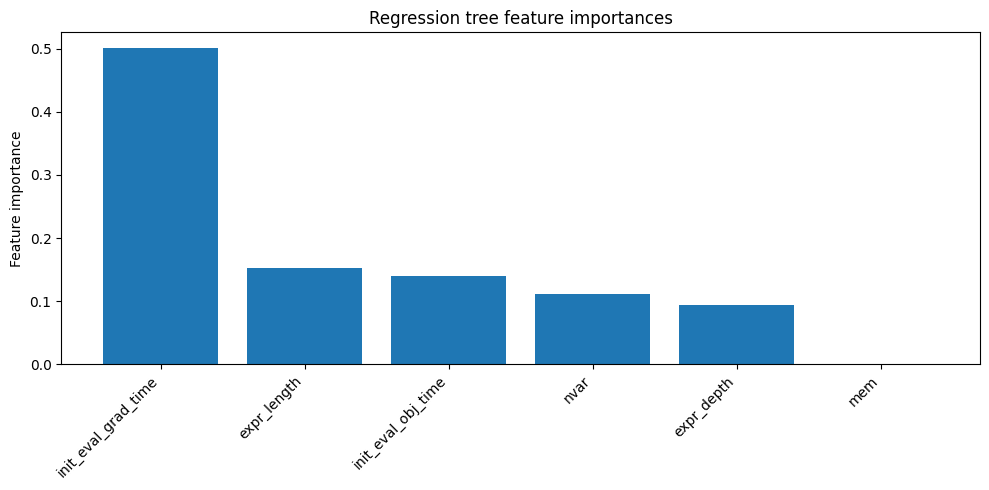

In [277]:
gb_importances = final_tree.feature_importances_
indices_gb = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_cols)), gb_importances[indices_gb])
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices_gb], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Regression tree feature importances")
plt.tight_layout()
plt.show()